In [72]:
from sympy import *

In [73]:
a,b,c,d = symbols("a,b,c,d")

In [74]:
x = Matrix([[a],[b]])

In [75]:
y = Matrix([[c],[d]])

In [76]:
normy= sqrt(y.T@y)
normx= sqrt(x.T@x)

In [77]:
v = x - (normx/normy)[0] * y

In [78]:
v= v

In [79]:
(2*(v@v.T)@x/(v.T@v)[0].simplify())[0].simplify()

2*(a*sqrt(c**2 + d**2) - c*sqrt(a**2 + b**2))*(a*(a*sqrt(c**2 + d**2) - c*sqrt(a**2 + b**2)) + b*(b*sqrt(c**2 + d**2) - d*sqrt(a**2 + b**2)))/((a*sqrt(c**2 + d**2) - c*sqrt(a**2 + b**2))**2 + (b*sqrt(c**2 + d**2) - d*sqrt(a**2 + b**2))**2)

In [80]:
v

Matrix([
[a - c*sqrt(a**2 + b**2)/sqrt(c**2 + d**2)],
[b - d*sqrt(a**2 + b**2)/sqrt(c**2 + d**2)]])

In [81]:
Hx = x - 2*(v@v.T)@x/(v.T@v)[0]

In [82]:
Hx

Matrix([
[a - (2*a*(a - c*sqrt(a**2 + b**2)/sqrt(c**2 + d**2))**2 + 2*b*(a - c*sqrt(a**2 + b**2)/sqrt(c**2 + d**2))*(b - d*sqrt(a**2 + b**2)/sqrt(c**2 + d**2)))/((a - c*sqrt(a**2 + b**2)/sqrt(c**2 + d**2))**2 + (b - d*sqrt(a**2 + b**2)/sqrt(c**2 + d**2))**2)],
[b - (2*a*(a - c*sqrt(a**2 + b**2)/sqrt(c**2 + d**2))*(b - d*sqrt(a**2 + b**2)/sqrt(c**2 + d**2)) + 2*b*(b - d*sqrt(a**2 + b**2)/sqrt(c**2 + d**2))**2)/((a - c*sqrt(a**2 + b**2)/sqrt(c**2 + d**2))**2 + (b - d*sqrt(a**2 + b**2)/sqrt(c**2 + d**2))**2)]])

householder


In [201]:
A = np.array([[2,1,2,2],[1,-7,6,5],[2,6,2,-5],[2,5,-5,1]])

In [202]:
w = Matrix([[4],[2],[2]])

array([[ 1, -7,  6],
       [ 2,  6,  2],
       [ 2,  5, -5]])

In [203]:
import numpy as np

In [281]:

def H(w):
    k = w.shape[0]
    return np.eye(k) - (2/ (w.T@w)[0] ) * w@w.T 

In [283]:
w

Matrix([
[4],
[2],
[2]])

In [282]:
B = np.eye(4)
B[1:,1:] = H(w)
B

array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.33333333, -0.66666667, -0.66666667],
       [ 0.        , -0.66666667,  0.66666667, -0.33333333],
       [ 0.        , -0.66666667, -0.33333333,  0.66666667]])

In [276]:
B @ Matrix(A)

Matrix([
[                 2.0,  1.0,  2.0,  2.0],
[                -3.0, -5.0,    0,  1.0],
[2.22044604925031e-16,  7.0, -1.0, -7.0],
[2.22044604925031e-16,  6.0, -8.0, -1.0]])

In [284]:
w2 = Matrix([7 + np.sqrt(49+36),6])          

In [290]:
B2 = np.eye(4)
B2[2:,2:] = H(w2)


In [299]:
 T  = (B2 @ B) @ Matrix(A) @ (B2 @ B).T

In [300]:
T

Matrix([
[                  2.0,              -3.0, -4.44089209850063e-16,                 0],
[                 -3.0,               1.0,     -4.88093530091976,  1.08465228909328],
[-4.44089209850063e-16, -4.88093530091976,     -11.4705882352941, 0.882352941176471],
[                    0,  1.08465228909328,      0.88235294117647,  6.47058823529412]])

3b)

In [115]:
np.arccos(4/np.sqrt(4**4 + 3**2))

1.3225359463694368

In [135]:
r = pi - np.arccos(4/np.sqrt(4**4 + 3**2)) 

In [147]:
np.arccos(4/np.sqrt(4**4 + 3**2))

1.3225359463694368

np.arcsin(-3/np.sqrt(4**4 + 3**2))

In [170]:
r = arg(4-3*I)

In [171]:
def givens(p,q,r):
    A = np.eye(3)
    A[p][p] = cos(r)
    A[q][q] = cos(r)
    A[q][p] = -sin(r)
    A[p][q] = sin(r)
    return A

In [172]:
G_1 = givens(0,1,r)

In [191]:
r2 = arg(5 + 1*I)

In [192]:
G_2 = givens(0,2,r2)

In [194]:
v1 = G_2 @ (G_1 @ np.array([4,-3,1]))

In [196]:
v1 

array([ 5.09901951e+00, -4.44089210e-16, -1.11022302e-16])

In [228]:
A

array([[ 2,  1,  2,  2],
       [ 1, -7,  6,  5],
       [ 2,  6,  2, -5],
       [ 2,  5, -5,  1]])

In [233]:
A[1:,1:]


array([[-7,  6,  5],
       [ 6,  2, -5],
       [ 5, -5,  1]])

qr-algorithm


In [319]:
def QR_alg(A):
    k = A.shape[0]
    i = 0
    while(i < 100):
        Q,R = np.linalg.qr(A)
        A = R@Q
        delta = np.max ( np.sort(np.diag(A)) - np.sort(np.linalg.eig(A)[0]) ) #cauchy?
        if delta <= 10**-10:
            
            break
        i += 1
       
        
    return i

In [320]:
QR_alg(A)

42

(c) (P) Now define a tolerance, e.g., τ = 10−10. Introduce a stopping criterion in your <br>
code, causing it to stop when the maximal difference between the true eigenvalues of <br>
A and the diagonal entries of Ak is smaller than τ .


In [238]:
QR_alg(A)

array([[-1.32910295e+001,  2.36545420e-015,  4.59736605e-015,
        -7.82600634e-016],
       [-3.88316009e-028,  6.78968886e+000, -3.27876064e-013,
         8.96006601e-016],
       [ 9.03702242e-042, -3.26552490e-013,  5.00000000e+000,
         3.06816057e-017],
       [ 1.98925722e-141, -8.88950243e-113, -6.74281199e-100,
        -4.98659411e-001]])

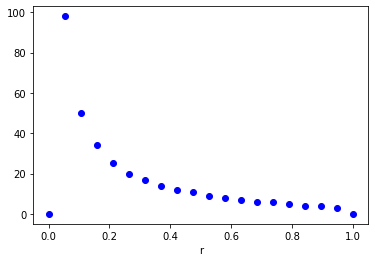

In [326]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1)
points = np.linspace(0,1,20)
for r in points:
    A = np.array([[1,r],[r,1]])

    axs.set_xlabel("r")
    axs.plot(r, QR_alg(A),"bo")

(d) (P) Use your code with the matrix given for at least five values of r ∈ (0, 1) and make <br>
a plot with r versus the number of iterations needed to achieve the given tolerance.<br>
Explain your findings by examining the ratio between the eigenvalues of A using (a)